<a href="https://colab.research.google.com/github/KhelifaAmeur/Stock-Crypto-predictions-LSTM/blob/master/Stock_prices_predicting_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This program uses an artifial recurrent neural network called Long Short Term Memory (LSTM)
#             in order to predict stock prices using the past 60 day stock price.

In [2]:
#Import necessary libraries
import math
import pandas_datareader as scraper
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#Get the stock values
df=scraper.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2020-09-20')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-09-14,115.930000,112.800003,114.720001,115.360001,140150100.0,115.360001
2020-09-15,118.830002,113.610001,118.330002,115.540001,184642000.0,115.540001
2020-09-16,116.000000,112.040001,115.230003,112.129997,154679000.0,112.129997


In [4]:
#Get the number of rows and columns in dataset
df.shape

(2193, 6)

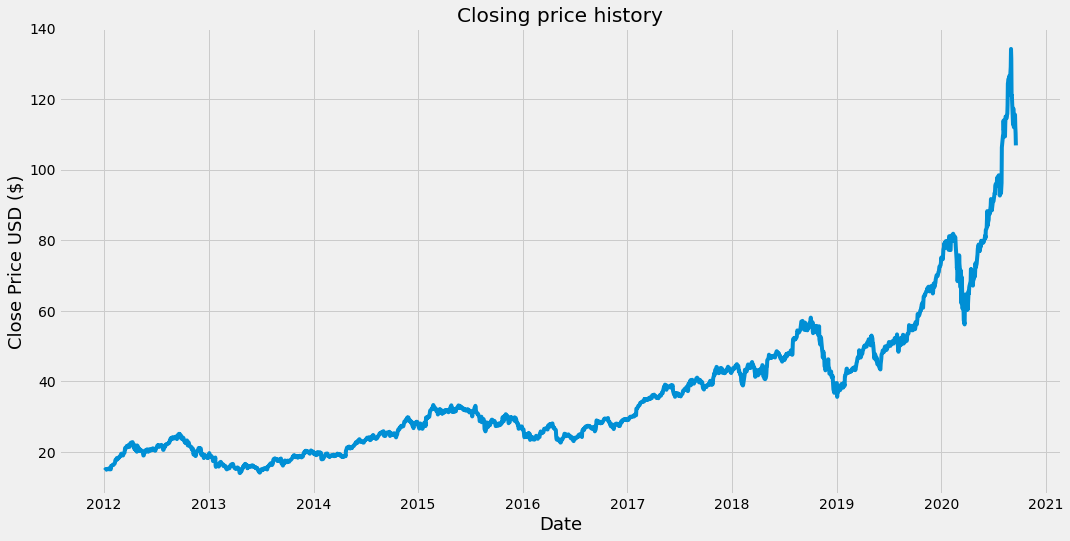

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create new data frame with only the Close column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1755

In [7]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.81660535],
       [0.80171752],
       [0.77260726]])

In [8]:
#Create training data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [10]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1695, 60, 1)

In [11]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1695/1695 [==============================] - 36s 21ms/step - loss: 2.6379e-04


In [14]:
#Create the testing data set
#Create new array containing scaled values from 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [15]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [16]:
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

In [18]:
#Evaluate the model
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.129702638521882

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


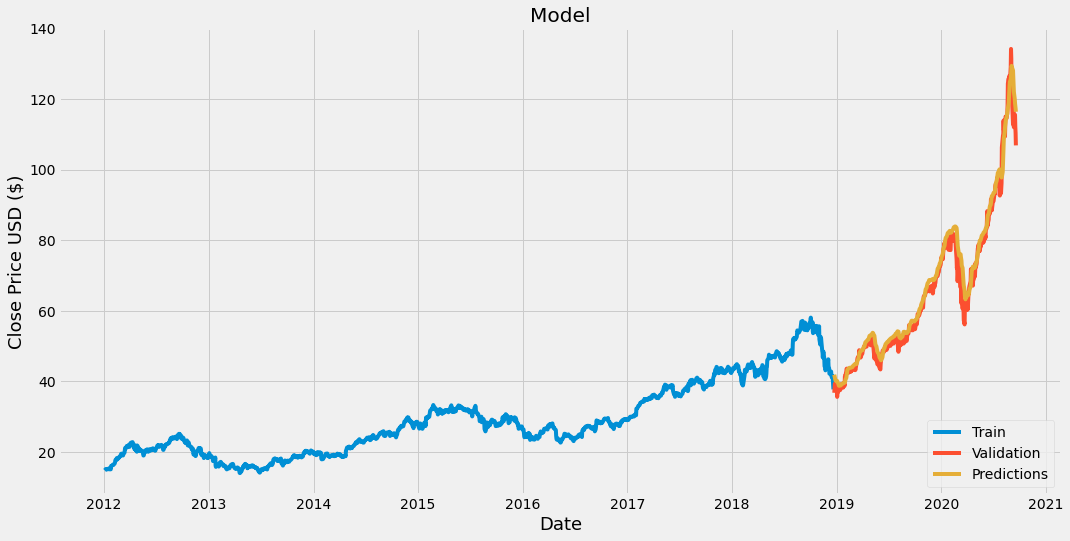

In [19]:
#Plot the data
train=data[:training_data_len]
validation=data[training_data_len:]
validation['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

In [20]:
validation

,Close,Predictions
Date,,
2018-12-24,36.707500,41.842739
2018-12-26,39.292500,41.029480
2018-12-27,39.037498,40.539627
2018-12-28,39.057499,40.239727
2018-12-31,39.435001,40.074574
...,...,...
2020-09-14,115.360001,120.042763
2020-09-15,115.540001,118.807968
2020-09-16,112.129997,118.087852


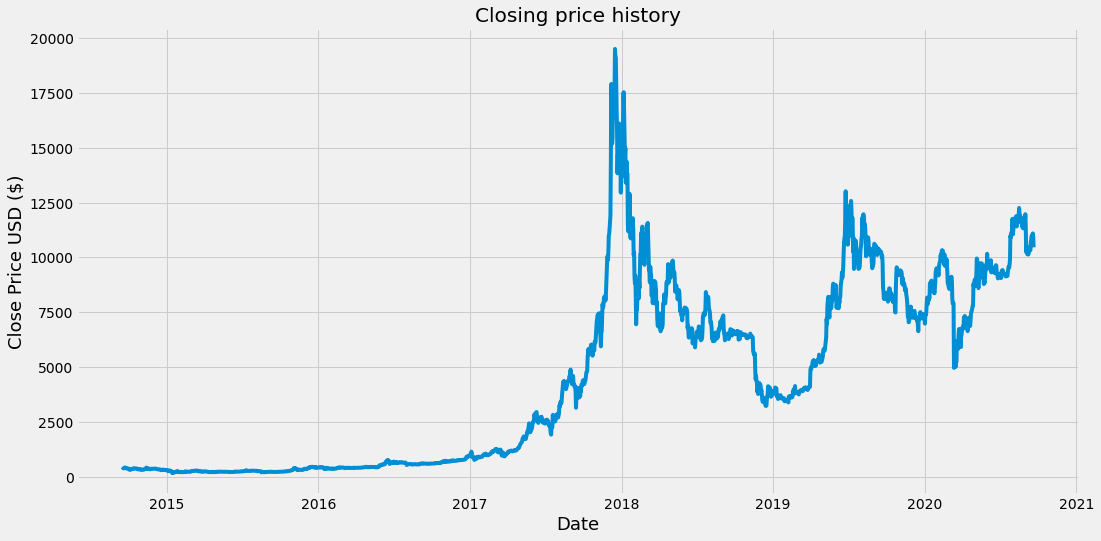

1697/1697 [==============================] - 36s 21ms/step - loss: 0.0013


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


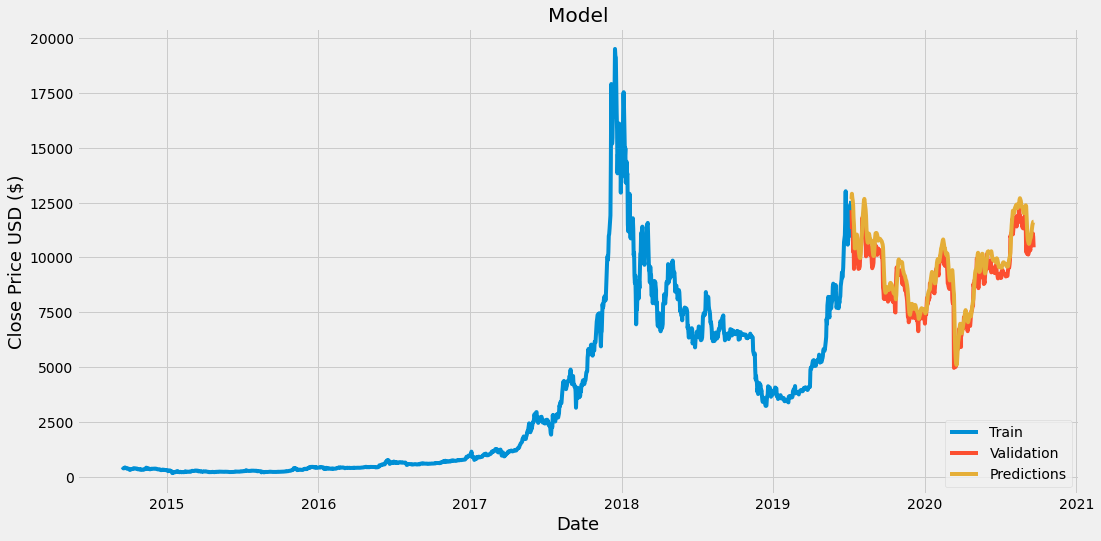

In [22]:
#Get the BTC-USD values
df=scraper.DataReader('BTC-USD',data_source='yahoo', start='2012-01-01', end='2020-09-20')
#Show the data
df
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
#Create new data frame with only the Close column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
#Create training data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
#convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
#Create the testing data set
#Create new array containing scaled values from 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Convert the data to a numpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the models predicted price values
predictions=model.predict(x_test)
predictions= scaler.inverse_transform(predictions)
#Evaluate the model
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#Plot the data
train=data[:training_data_len]
validation=data[training_data_len:]
validation['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()


In [23]:
rmse

625.0467014269275